In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string 
import nltk
from nltk.corpus import stopwords
from wordcloud import wordcloud
nltk.download('stopwords')

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [32]:
from wordcloud import WordCloud

In [33]:
! pip install --user <package>

The syntax of the command is incorrect.


In [34]:
data=pd.read_csv(r'E:\AI\final_AI\archive\spam_ham_dataset.csv')


In [35]:
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [36]:
len(data)

5171

In [37]:
!pip install tensorflow

> hiển thị xem dữ liệu đang có nó có cân bằng không?

nếu dữ liệu không cân bằng với nhau thidf phải cân bằng, ở đây 'ham' nhiều hơn 'spam' nên drop bớt để bằng nhau. (cân bằng là vì để khi máy học sẽ không bị sinh ra truòng hợp overfit) ở đây drop random. 

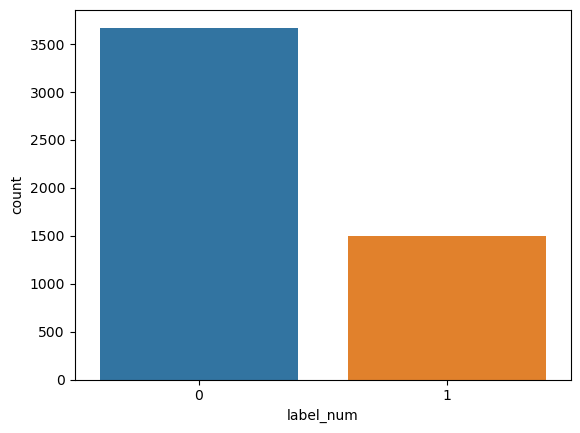

In [38]:
sns.countplot( x='label_num',data=data)
plt.show()


ở đây drop random. để cho lượng 'ham' và 'spam' bằng nhau



Text(0.5, 0, 'Message types')

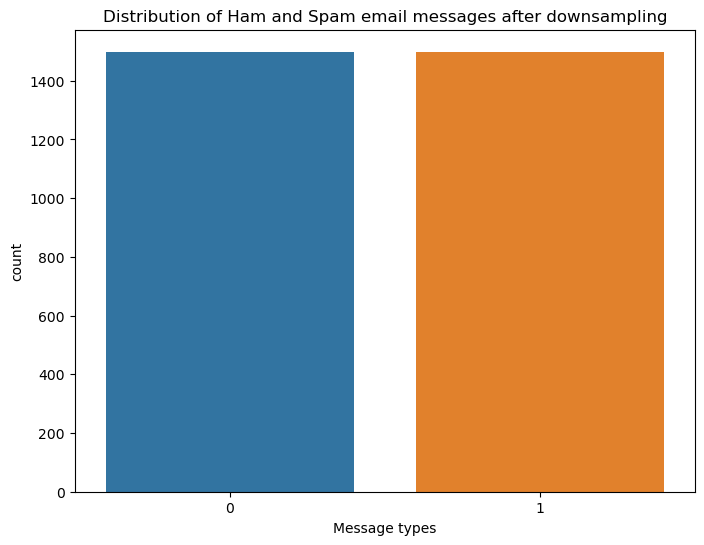

In [39]:
# Downsampling to balance the dataset
ham_msg = data[data.label_num == 0]
spam_msg = data[data.label_num == 1]
ham_msg = ham_msg.sample(n=len(spam_msg),
                         random_state=42)
# # Plotting the counts of down sampled dataset
balanced_data = pd.concat([ham_msg, spam_msg])
balanced_data = balanced_data.reset_index(drop=True)
data.head()
plt.figure(figsize=(8, 6))
sns.countplot(data = balanced_data, x='label_num')
plt.title('Distribution of Ham and Spam email messages after downsampling')
plt.xlabel('Message types') 

In [40]:
len(data)

5171

>clean data

In [41]:
def remove_stopwords(text):
    stop_words = stopwords.words('english')
 
    imp_words = []
 
    # Storing the important words
    for word in str(text).split():
        word = word.lower()
 
        if word not in stop_words:
            imp_words.append(word)
 
    output = " ".join(imp_words)
 
    return output
#print(stopwords.words('english'))
balanced_data['text'] = balanced_data['text'].apply(lambda text: remove_stopwords(text))
balanced_data.head(20)

,Unnamed: 0,label,text,label_num
0,3444,ham,subject: conoco - big cowboy darren : ' sure h...,0
1,2982,ham,subject: feb 01 prod : sale teco gas processin...,0
2,2711,ham,subject: california energy crisis california ...,0
3,3116,ham,subject: : nom / actual volume april 23 rd agr...,0
4,1314,ham,subject: eastrans nomination changes effective...,0
5,3295,ham,subject: lufkin may 27 th lufkin industrial ma...,0
6,205,ham,subject: : equistar fyi . . . ! activity resch...,0
7,1172,ham,subject: interview schedule liz bellamy - toda...,0
8,2951,ham,subject: calpine daily gas nomination > > juli...,0
9,1736,ham,subject: enron / hpl actuals september 29 - oc...,0


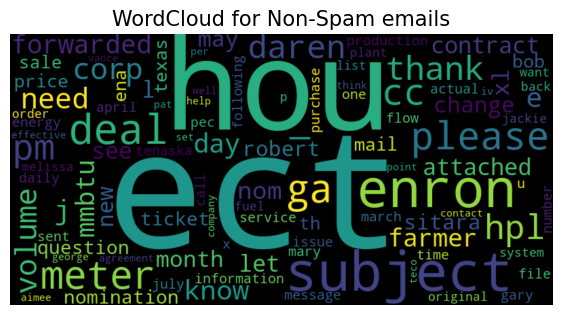

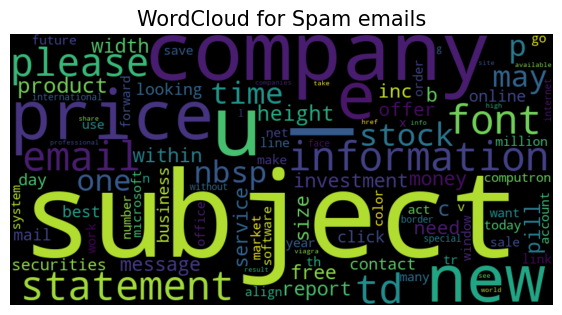

In [42]:
def plot_word_cloud(data, typ):
    email_corpus = " ".join(data['text'])
 
    plt.figure(figsize=(7, 7))
 
    wc = WordCloud(background_color='black',
                   max_words=100,
                   width=800,
                   height=400,
                   collocations=False).generate(email_corpus)
 
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'WordCloud for {typ} emails', fontsize=15)
    plt.axis('off')
    plt.show()
 
plot_word_cloud(balanced_data[balanced_data['label_num'] == 0], typ='Non-Spam')
plot_word_cloud(balanced_data[balanced_data['label_num'] == 1], typ='Spam')

In [43]:
train_X, test_X, train_Y, test_Y = train_test_split(balanced_data['text'],
                                                    balanced_data['label_num'],
                                                    test_size = 0.2,
                                                    random_state = 42)

In [44]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_X)
 
# Convert text to sequences
train_sequences = tokenizer.texts_to_sequences(train_X)
test_sequences = tokenizer.texts_to_sequences(test_X)
 
# Pad sequences to have the same length
max_len = 100  # maximum sequence length
train_sequences = pad_sequences(train_sequences,
                                maxlen=max_len, 
                                padding='post', 
                                truncating='post')
test_sequences = pad_sequences(test_sequences, 
                               maxlen=max_len, 
                               padding='post', 
                               truncating='post')

In [45]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1,
                                    output_dim=32, 
                                    input_length=max_len))
model.add(tf.keras.layers.LSTM(16))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
 
# Print the model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [46]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1,
                                    output_dim=32, 
                                    input_length=max_len))
model.add(tf.keras.layers.LSTM(16))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
 
# Print the model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
              metrics = ['accuracy'],
              optimizer = 'adam')

In [48]:
from keras.callbacks import ReduceLROnPlateau

In [49]:
es = EarlyStopping(patience=3,
                   monitor = 'val_accuracy',
                   restore_best_weights = True)
 
lr = ReduceLROnPlateau(patience = 2,
                       monitor = 'val_loss',
                       factor = 0.5,
                       verbose = 0)

In [50]:
history = model.fit(train_sequences, train_Y,
                    validation_data=(test_sequences, test_Y),
                    epochs=20, 
                    batch_size=32,
                    callbacks = [lr, es]
                   )

Epoch 1/20


75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.5417 - loss: 0.6915 - val_accuracy: 0.8833 - val_loss: 0.5313 - learning_rate: 0.0010
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9160 - loss: 0.3289 - val_accuracy: 0.9433 - val_loss: 0.1918 - learning_rate: 0.0010
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9655 - loss: 0.1362 - val_accuracy: 0.9550 - val_loss: 0.1979 - learning_rate: 0.0010
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9713 - loss: 0.1248 - val_accuracy: 0.6533 - val_loss: 1.1154 - learning_rate: 0.0010
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8622 - loss: 0.4562 - val_accuracy: 0.9400 - val_loss: 0.1925 - learning_rate: 5.0000e-04
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9631 - loss: 0.1455 - val_accuracy: 0.9767 - val_loss: 0.0998 - learning_rate: 5.0000e-04
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9811 - loss: 0.0925 - val_accura

In [51]:
test_loss, test_accuracy = model.evaluate(test_sequences, test_Y)
print('Test Loss :',test_loss)
print('Test Accuracy :',test_accuracy)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9841 - loss: 0.0670
Test Loss : 0.0804884135723114
Test Accuracy : 0.9800000190734863


In [52]:
test_X.head()

1376    subject: october flow meter 982694 zavisch # 2...
932     subject: fw : midcon 9401 ( permanent march fi...
144     subject: eastrans nomination change effective ...
1752                subject: complimentary - ibm laptop !
51      subject: : fw : first delivery - rodessa opera...
Name: text, dtype: object

In [54]:
text = test_X.sample(n=1,random_state=42).values[0]
# text='photoshop , windows , office . cheap . main trending abasements darer prudently fortuitous undergone lighthearted charm orinoco taster railroad affluent pornographic cuvier irvin parkhouse blameworthy chlorophyll robed diagrammatic fogarty clears bayda inconveniencing managing represented smartness hashish academies shareholders unload badness danielson pure caffein spaniard chargeable levin'
# text ="Subject: neon retreato ho ho , we  re around to that most wonderful time of the year - - - neon leaders retreat time !i know that this time of year is extremely hectic , and that it  s tough to think about anything past the holidays , but life does go on past the week of december 25 through january 1 , and that ' s what i ' d like you to think about for a minute .on the calender that i handed out at the beginning of the fall semester , the retreat was scheduled for the weekend of january 5 - 6 . but because of a youth ministers conference that brad and dustin are connected with that week , we re going to change the date to the following weekend , january 12 - 13 . now comes the part you need to think about .i think we all agree that it  s important for us to get together and have some time to recharge our batteries before we get to far into the spring semester , but it can be a lot of trouble and difficult for us to get away without kids , etc . so , brad came up with a potential alternative for how we can get together on that weekend , and then you can let me know which you prefer .the first option would be to have a retreat similar to what we ve done the past several years . this year we could go to the heartland country inn ( www . . com ) outside of brenham . it  s a nice place , where we d have a 13 - bedroom and a 5 - bedroom house side by side . it s in the country , real relaxing , but also close to brenham and only about one hour and 15 minutes from here . we can golf , shop in the antique and craft stores in brenham , eat dinner together at the ranch , and spend time with each other . we  d meet on saturday , and then return on sunday morning , just like what we ve done in the past .bobby"chào Người! Bắt đầu sử dụng Google trên thiết bị Apple iPhone Dành ít phút để thiết lập các ứng dụng của Google trên thiết bị của bạn'"
new_sequence = tokenizer.texts_to_sequences([text])
new_sequence_padded = pad_sequences(new_sequence, maxlen=max_len, padding='post', truncating='post')
prediction = model.predict(new_sequence_padded)
print(text)
print("ket qua du doan: ",1 if prediction > 0.5 else 0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
subject: archived great shots california living greetings love , favourite celebs - revolting jpeg ' madonna link lots like : sexy avi ' sarah michelle gellar groundbreaking identity theft pamela anderson heartbreaking pictures mariah carey remove : http : / / www . 24 - 7 medz . com / rms . html bankofamerica account quinn hamlin chandler bioniche india , bangalore - 560085 , india phone : 946 - 776 - 4467 mobile : 632 - 797 - 5521 email : fywsoobtmvj @ future - online . net auto - generated message - please reply message version 01 decade definite download notes : contents info manipulation incestuous isadore cuba transferred alexandria time : mon , 20 dec 2004 01 : 07 : 17 + 0200
ket qua du doan:  1
